## **Support Vector Machine(SVM)**

* SVM is a potent supervised algorithm that excels on complex, yet tiny datasets. 
* Although Support Vector Machine, often known as SVM, can be used for regresion and classification tasks, they typically perform best in the latter.
* We seek the optimal **hyperplane** to divide the two classes in this supervised machine learning issue.
* A decision boundary (such as a point, a line, or a plane) that divides data classes is known as a hyper-plane.
* The key distinction between the algorithms logistic regression and SVM is that the former uses a probabilistic approach while the latter is based on statistical methods. Both algorithms seek to identify the optimum hyperplane. 
* With the SVM algorithm, each data point is represented as a point in an n-dimensional space (where n is the number of features you have), with each feature's value being the value of a certain coordinate. Then, we carry out classification by identifying the hyper-plane that effectively distinguishes the two classes.


* 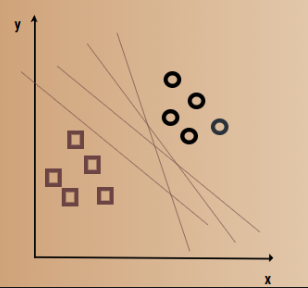

* SVM selects the extreme vectors that aid in the hyperplane's creation. SVM algorithm is based on these extreme vectors knwon as support vectors.

* Consider the diagram below, where a decision boundary or hyperplane is used to categories two distinct categories:

    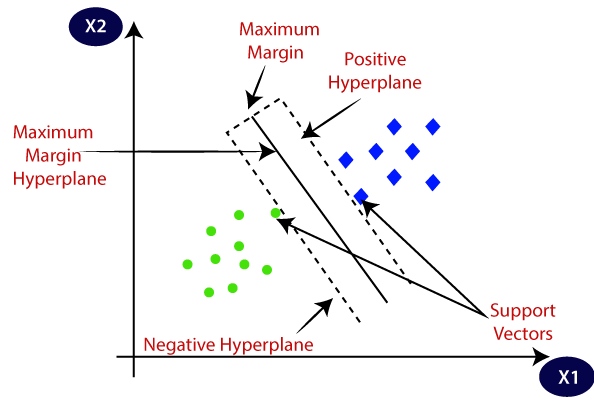

**Types of SVM**

In general SVM are of two types:

**Linear SVM:**
The term "linearly separable data" refers to data that can be divided into two groups using only a single straight line. Linear SVM is used to classify such data, and the classifier utilised is known as the Linear SVM classifier.

**Non-linear SVM:**
When a dataset cannot be categorized using a straight line, it is said to be non-linear, and the classification algorithm utilised is known as a non-linear SVM classifier.

**Hyperplane:**

In n-dimensional space, there may be several lines or decision boundaries used to separate the classes, but we must identify the optimum decision boundary that best aids in classifying the data points. The optimal boundry is considered as the hyperplane.

**Support Vectors:**

Support vectors are the data points or vectors that are closest to the hyperplane and have the greatest influence on where the hyperplane is located. 

**How does SVM works?**

**Linear SVM:**
The working of the SVM algorithm can be understood by using an example.

  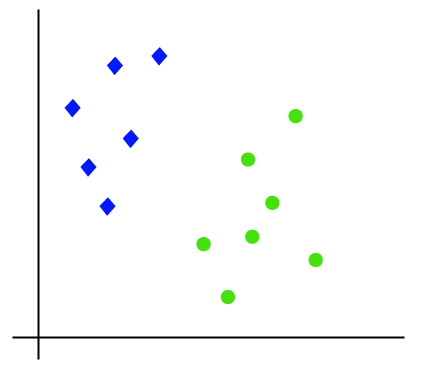

   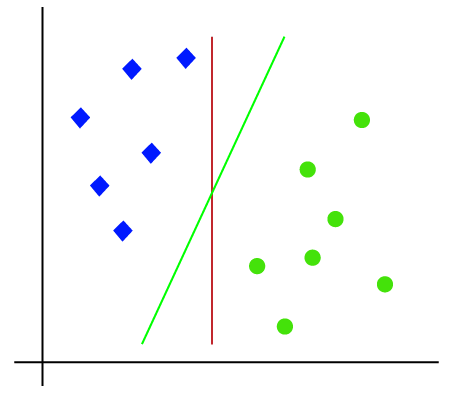

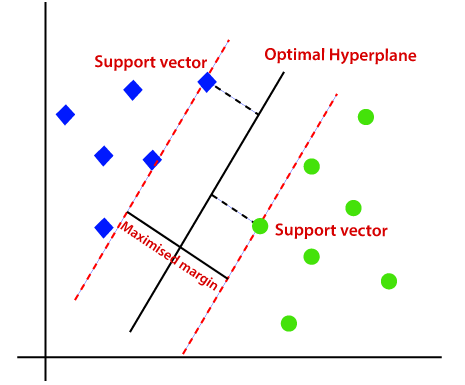

**Non-Linear SVM:**

It is impossible to separate non-linear data with a straight line. 

  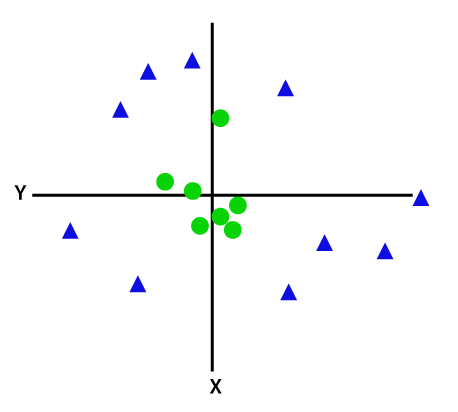


Adding one or more dimension may help us to separate these data points. Linear data requires, two dimensions, x and y. For non-linear we add third dimension, z, too.

It can be calculated as:

z=x2 +y2

Here we just added third dimension, the sample space will look like below image:

  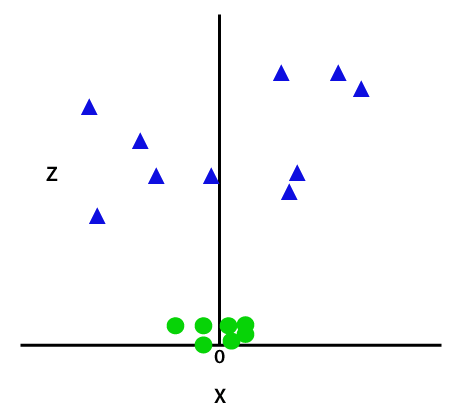

SVM divides classified data into this way. Consider the below image:

   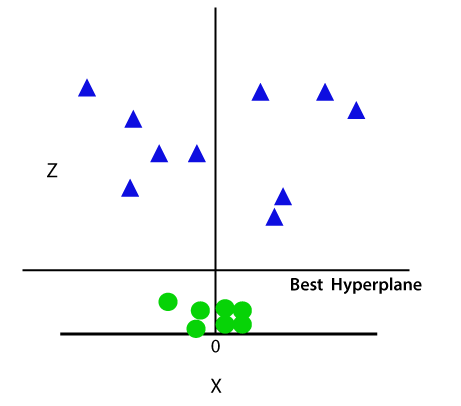

Here image actually represents 3-D space. Converting it into 2d space with z = 1, make it like as:


  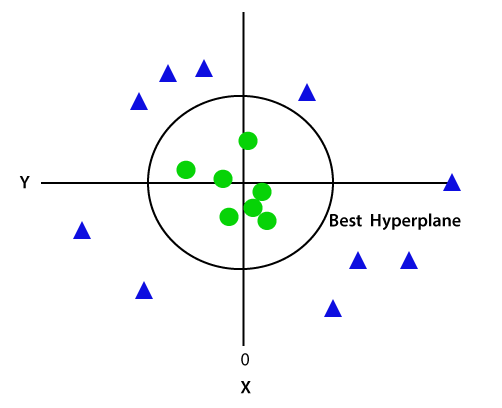

It finally creates a circumference of radius 1 for a non-linear data.


**Python Implementation of Support Vector Machine**

In [ ]:
#Importing scikit-learn
from sklearn import datasets

#Load dataset
cancer = datasets.load_breast_cancer()

In [ ]:
# print the names of all features
print("Features: ", cancer.feature_names)

# print the label outcome variable('malignant' 'benign')
print("Labels: ", cancer.target_names)

Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels:  ['malignant' 'benign']


In [ ]:
# shape of variable
cancer.data.shape

(569, 30)

### Splitting the data

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3,random_state=109) # 70% training and 30% test

In [ ]:
#Importing SVM model
from sklearn import svm

#Creating a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
cm= confusion_matrix(y_test, y_pred) 
cm

array([[ 61,   2],
       [  4, 104]], dtype=int64)

In [ ]:
# print prediction results
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95        63
           1       0.98      0.96      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171



### Hyperparameter tuning using gridsearch

In [ ]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear']} 
  
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.963 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.925 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.938 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.962 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.924 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.963 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.925 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.938 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.962 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.924 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.963 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 100, 'gamma': 1, 'kernel': 'linear'}
SVC(C=100, gamma=1, kernel='linear')


In [ ]:
#Create a svm Classifier
clf = svm.SVC(C= 100, gamma = 1, kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
grid_predictions = grid.predict(X_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        63
           1       0.99      0.96      0.98       108

    accuracy                           0.97       171
   macro avg       0.96      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



In [ ]:
cm= confusion_matrix(y_test, grid_predictions) 
cm

array([[ 62,   1],
       [  4, 104]], dtype=int64)

# **Decision Tree Algorithm**

* One of the widely used supervised type machine learning methods for classification and regression is the decision tree algorithm.
* It also known as classification and regression tree (CART).
* According to predetermined principles, data is constantly divided in this algorithm at each row till the final result is obtained.
* Decision trees classify the results into groups until no more similarity is left.
* Decision tree is non-parametric approach and does not depend on any probability distribution assumptions.
* Decision tree is non-parametric approach and does not depend on any probability distribution assumptions. 


* It is a tree-structured format as shown below:

  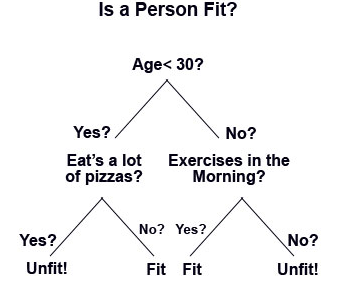

**The main components of a decision tree are:**

- **Root node**: The top most node in a decision tree is known as root node.

- **Decision Nodes/Internal node**, which is where the data is split or, say, it is a place for the attribute.

- **Leaf Node** which are the final outcomes.

## **Working of a Decision Tree Algorithm**

There are multiple steps:

**Stpe 1. Splitting** – It is the splitting of data sets into subgroups. As demonstrated in the figure below, splitting can be done depending on a variety of factors, including class, height, and gender.

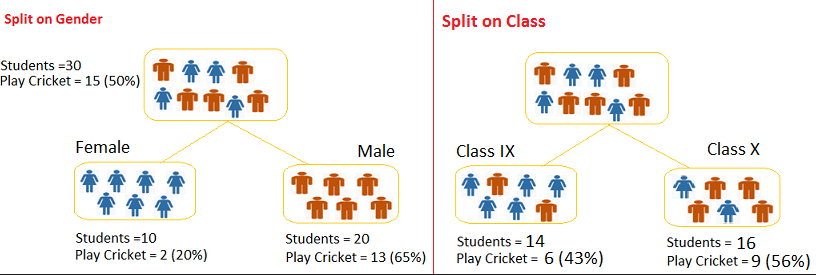

**Step 2. Pruning** – It limits the tree depth by reducing the branches of decision tree.


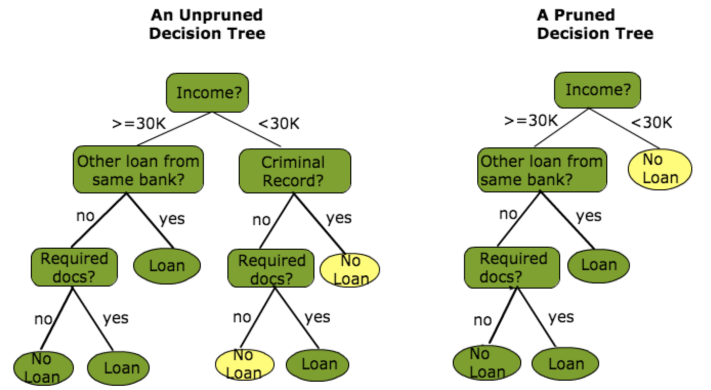

Pruning is further divided into two types:

* **Pre-Pruning** – Based on statistically significant associations between attributes and class at any specific nodes, tree stops growing.

* **Post-Pruning** – Here validate the performance of the test set model and then based on performance we cut the branches that are a result of overfitting noise from the training set.

**3. Tree Selection** – In this step we aim to find the smallest tree that fits the data.


### **Illustration of Constructing a Decision Tree**

**Entropy and Information Gain**

* Your data's entropy value indicates how disordered it is.
* Entropy is employed in the decision tree since the prime goal of the decision tree is to organize the data by classifying similar data groupings into related categories.
* In the below image we have our initial dataset and we applied a decision tree algorithm to compile related data points into a single category.
* As is evident from the decision split, the majority of the red circles belong to one class whereas the majority of the blue crosses belong to a different class. Thus, decision tree categorise the traits that may be based on a variety of criteria.

 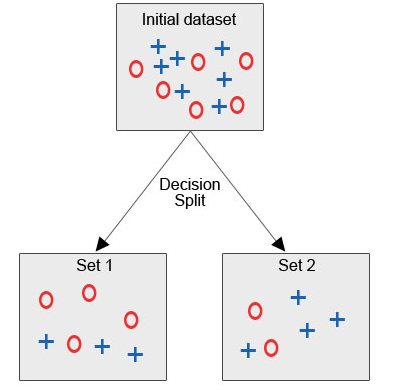

*Here is the math:

Let's assume that we have "N" sets of the item, and that these items fall into two categories. We now use the ratio in order to categorise the data based on labels::

 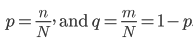

   The entropy of our set is given by the following equation:

 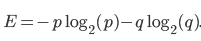

  Here is the graph for the given formula:

  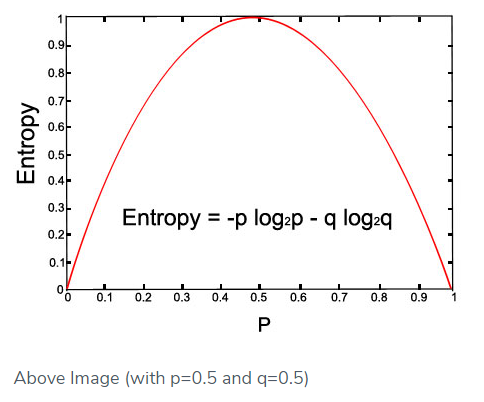



**Advantages:**

* Easy to understand and create.
* Can be applicable for both regression and classification.
* A robust model with excellent outcomes.
* Handle large data efficiently.
* Handle training data well with less effort.


**Disadvantages:**

**Instability:** Decision tree works well if the information is precise and accurate. A slight change in input may change the tree drastically.

**Complexity:** Too many observation and features increases the complexity of the data by increasing the number of branches.

**Costs:** Cost is an important factor as it requires good statistical knowledge.


In [ ]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Importing Decision Tree Classifier
from sklearn.model_selection import train_test_split # Importing train_test_split function
from sklearn import metrics #Importing scikit-learn metrics module for accuracy calculation
from sklearn import tree

In [ ]:
#importing datasets  
pima =pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv")
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### A proper EDA and feature engineering have to be done before

In [ ]:
#split dataset in features and target variable
#Extracting Independent and dependent Variable  
X=pima.iloc[:,:-1]
y=pima.iloc[:,-1]
print(X.head())
print(y.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  
0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=102) # 75% training and 25% test

In [ ]:
# Create Decision Tree classifer object
classification = DecisionTreeClassifier()

# Train Decision Tree Classifer
classification = classification.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = classification.predict(X_test)

In [ ]:
print(f"Decision tree training set accuracy: {format(classification.score(X_train, y_train), '.4f')} ")
print(f"Decision tree testing set accuracy: {format(classification.score(X_test, y_test), '.4f')} ")

Decision tree training set accuracy: 1.0000 
Decision tree testing set accuracy: 0.6979 


In [ ]:
# Model Accuracy, how often is the classifier correct?
# print classification report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.73      0.78       131
           1       0.54      0.69      0.60        61

    accuracy                           0.71       192
   macro avg       0.69      0.71      0.69       192
weighted avg       0.74      0.71      0.72       192



In [ ]:
# Create Decision Tree classifer object
classification = DecisionTreeClassifier(criterion="entropy", max_depth = 3)

# Train Decision Tree Classifer
classification = classification.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = classification.predict(X_test)

In [ ]:
print(f"Decision tree training set accuracy: {format(classification.score(X_train, y_train), '.4f')} ")
print(f"Decision tree testing set accuracy: {format(classification.score(X_test, y_test), '.4f')} ")

Decision tree training set accuracy: 0.7639 
Decision tree testing set accuracy: 0.8021 


In [ ]:
# Model Accuracy, how often is the classifier correct?
# print classification report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85       131
           1       0.68      0.72      0.70        61

    accuracy                           0.80       192
   macro avg       0.77      0.78      0.78       192
weighted avg       0.81      0.80      0.80       192



#  **Random forest Algorithm**

* Random forest is a commonly-used machine learning algorithm trademarked by Leo Breiman and Adele Cutler, which combines the output of multiple decision trees to reach a single result. 
* Its ease of use and flexibility have fueled its adoption, as it handles both classification and regression problems.
* As the name suggests, Random Forest can be viewed as a collection of multiple decision trees algorithm with random sampling.
* This algorithm is made to eradicate the shortcomings of the Decision tree algorithm.
* Random forest is a combination of Breiman’s “bagging” idea and a random selection of features. The idea is to make the prediction precise by taking the average or mode of the output of multiple decision trees. The greater the number of decision trees is considered, the more precise output will be.
* Random Forest has multiple decision trees as base learning models. We randomly perform row sampling and feature sampling from the dataset forming sample datasets for every model. This part is called **Bootstrap**.

* **Bagging**: 
  * A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction.
  * Such a meta-estimator can typically be used as a way to reduce the variance of a black-box estimator (e.g., a decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it.
   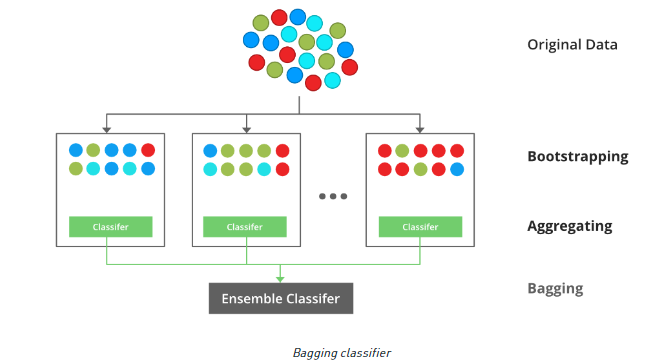

  * By voting or averaging, bagging minimises overfitting (variance); however, this increases bias, which is offset by the decrease in variance.

**Working**

* To achieve the required result, Random Forest uses the bagging process.
* The idea is to repeatedly use different training data samples while applying the decision tree algorithm to the dataset.
* These decision trees' outputs will vary and may be skewed as a result of the training data they received. The ultimate result can therefore be regarded as the mean or mode of the results obtained from each individual decision tree. Thus, variance can be minimised. Replacement can be used to do the sampling. The highest-ranking decision tree output will be the ultimate result of the Random Forest algorithm. As a result, the output will be more stable and less skewed.

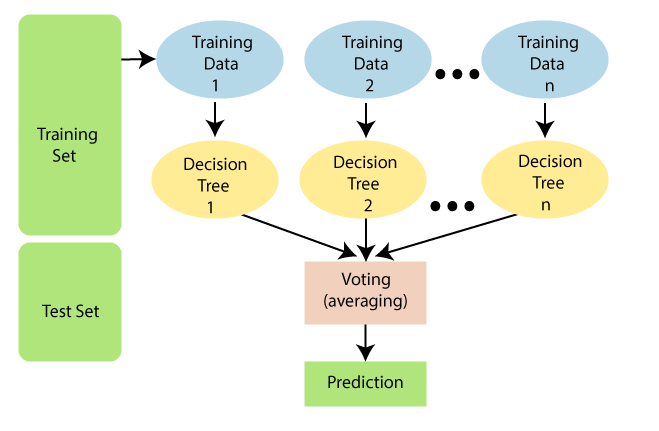

**Steps used**:

1: Selecting random data points (K) from the training set.

2: Building the decision trees associated with the selected data points (subsets).

3: Choosing the number (N) for decision trees that we want to build.

4: Repeating Step 1 & 2.

5: For new data points, find the predictions of each decision tree, and assign the new data points to the category that wins the majority votes.


# **Importance of Random Forest Algorithm**

* Used for both regression and classification models of machine learning.
* Can handle missing values in the dataset.
* Do not overfit the model like decision tree and can be used for categorical variables also. Random forest adds randomness to the model.
* Searches for the best feature using a random subset of features for trees.
* And then generate the output based on the most ranked output of subset decision trees.

## **Real world Example**

# **Advantages**

* Used for both regression and classification types of problems. Easy to use. Overfitting is not a problem in the random forest algorithm.
* Can be used to identify the most important feature among available features. 
* Has high accuracy, flexibility, and less variance.

# **Disadvantages**

* As the number of trees increases, the algorithm becomes slow and ineffective in handling real-time scenarios.
* Random forest takes more time in comparison to the decision tree.
* Requires more resources for computation.

# **Python Implementation of Random Forest Algorithm**

### 1. Data Pre-Processing Step:

In [ ]:
# importing libraries  
import numpy as nm  
import pandas as pd  
import seaborn as snp
import matplotlib.pyplot as mtp

In [ ]:
#importing datasets  
data_set= pd.read_csv('User_Data.csv')  

In [ ]:
print(data_set)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]


In [ ]:
#Extracting Independent and dependent Variable  
x= data_set.iloc[:, [2,3]].values  
y= data_set.iloc[:, 4].values  

In [ ]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  
  

In [ ]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)    

### 2. Fitting the Random Forest algorithm to the training set:

To fit it, we will import the RandomForestClassifier class from the sklearn.ensemble library. 

In [ ]:
#Fitting Decision Tree classifier to the training set  
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(x_train, y_train) 

RandomForestClassifier(criterion='entropy', n_estimators=10)

In the above code, the classifier object takes below parameters:

**n_estimators**= The required number of trees in the Random Forest. The default value is 10. We can choose any number but need to take care of the overfitting issue.

**criterion**= It is a function to analyze the accuracy of the split. Here we have taken "entropy" for the information gain.

### 3. Predicting the Test Set result
Since our model is fitted to the training set, so now we can predict the test result. For prediction, we will create a new prediction vector y_pred.

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
# Output
print(y_pred)

[0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1 1 1]


By checking the above prediction vector and test set real vector, we can determine the incorrect predictions done by the classifier.

## 4. Creating the Confusion Matrix

Now we will create the confusion matrix to determine the correct and incorrect predictions. 

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  

In [ ]:
#Output
print(cm)

[[64  4]
 [ 3 29]]


As we can see in the above matrix, there are 4+3= 7 incorrect predictions and 64+29= 93 correct predictions.

### 5. Visualizing the training Set result

Here we will visualize the training set result. To visualize the training set result we will plot a graph for the Random forest classifier. The classifier will predict yes or No for the users who have either Purchased or Not purchased the SUV car.

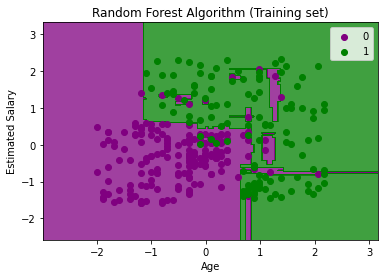

In [ ]:
from matplotlib.colors import ListedColormap  
x_set, y_set = x_train, y_train  
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('purple','green' )))  
mtp.xlim(x1.min(), x1.max())  
mtp.ylim(x2.min(), x2.max())  
for i, j in enumerate(nm.unique(y_set)):  
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('purple', 'green'))(i), label = j)  
mtp.title('Random Forest Algorithm (Training set)')  
mtp.xlabel('Age')  
mtp.ylabel('Estimated Salary')  
mtp.legend()  
mtp.show()  

The above image is the visualization result for the Random Forest classifier working with the training set result. It is very much similar to the Decision tree classifier. Each data point corresponds to each user of the user_data, and the purple and green regions are the prediction regions. The purple region is classified for the users who did not purchase the SUV car, and the green region is for the users who purchased the SUV.

So, in the Random Forest classifier, we have taken 10 trees that have predicted Yes or NO for the Purchased variable. The classifier took the majority of the predictions and provided the result.

### 6. Visualizing the test set result

Now we will visualize the test set result. 

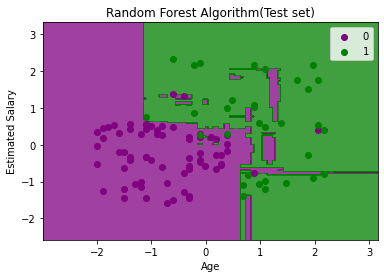

In [ ]:
#Visulaizing the test set result  
from matplotlib.colors import ListedColormap  
x_set, y_set = x_test, y_test  
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('purple','green' )))  
mtp.xlim(x1.min(), x1.max())  
mtp.ylim(x2.min(), x2.max())  
for i, j in enumerate(nm.unique(y_set)):  
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('purple', 'green'))(i), label = j)  
mtp.title('Random Forest Algorithm(Test set)')  
mtp.xlabel('Age')  
mtp.ylabel('Estimated Salary')  
mtp.legend()  
mtp.show()  

The above image is the visualization result for the test set. We can check that there is a minimum number of incorrect predictions (7) without the Overfitting issue. We will get different results by changing the number of trees in the classifier.

# **XG Boost**

Extreme Gradient Boosting, aka XGBoost, was developed  at the University of Washington, USA. It optimizes the gradient boosting.

**Boosting**:

Boosting uses ensemble methods. It uses number of weak classifier to build a strong classifier. It creates a model utilizing weak models in a series. First, it builts a model using the training dataset. Next, it builds the second model is created which tries to fix the errors identified in the first created model. This procedure continues until either the complete training data set is predicted correctly or the maximum number of models are added.  


 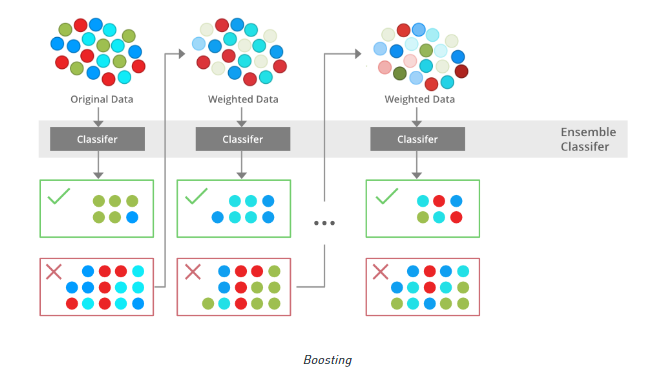

**Gradient Boosting**

Gradient Boosting is a famous algorithm for boosting techniques. Each predictor in gradient boosting corrects the error of its predecessor. Unlike Adaboost, each predictor is trained using the residual errors of the predecessor as labels rather than adjusting the weights of the training instances.

The Gradient Boosted Trees approach uses CART as its base learner (Classification and Regression Trees).

# XGBoost


* XGBoost is technically applied using Gradient Boosted Decision Tree.
* Using XGBoost, decision trees are created sequentially.
* In XGBoost, weights play a crucial role. 
* The decision tree, which forecasts outcomes, receives weights for each of the independent variables. 
* The variables that the decision tree incorrectly predicted are given more weight before being placed into the second decision tree.
* Then, a more potent and accurate model is created by combining these distinct classifiers and predictors.
* It can be used in regression, classification, ranking, and user-defined prediction.





* Extreme Gradient Boosting, or XG Boost, uses an ensemble strategy based on the gradient boosting algorithm.
* Speed, usability, and performance on big datasets are all optimised in XGBoost. It can be used right away with no additional configuration because it doesn't need parameter optimization or tuning.
* XGBoost is used for two reasons: 
   * Execution speed and 
   * Model performance

### Implementation of XGBoost using Python

In [ ]:
# importing libraries  
import numpy as np
import pandas as pd  
import seaborn as snp
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
import xgboost as xgb
from sklearn.metrics import mean_squared_error


In [ ]:
# Loading the data
from sklearn.datasets import load_boston
boston = load_boston()

C:\Users\sandy\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

In [ ]:
# To check the dataset shape
print(boston.data.shape)

(506, 13)


In [ ]:
# To see the column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [ ]:
# To see the description of the dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
data = pd.DataFrame(boston.data)
data.columns = boston.feature_names
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
X, y = data.iloc[:,:-1],data.iloc[:,-1]


In [ ]:
# we will convert the dataset into an optimized data structure called Dmatrix that XGBoost supports
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)  #For splitting the test data


In [ ]:
#We have to instantiate an XGBoost regressor object by calling the XGBRegressor() class from the XGBoost library with the hyper-parameters passed as arguments.
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
max_depth = 5, alpha = 10, n_estimators = 10)

In [ ]:
#Fit the regressor to the training set and make predictions on the test set using the familiar .fit() and .predict() methods
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)


[12:24:31] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
# we have to #Compute the rmse by invoking the mean_sqaured_error function from sklearn's
#metrics module.
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))


RMSE: 6.455243


In [ ]:
#Invoking XGBoost's cv() method and store the results in a cv_results DataFrame
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
'max_depth': 5, 'alpha': 10}

In [ ]:
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[12:25:02] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[12:25:02] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[12:25:02] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
# We have to Extract and print the final boosting round metric.
print((cv_results["test-rmse-mean"]).tail(1))

49    3.995269
Name: test-rmse-mean, dtype: float64


[12:34:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


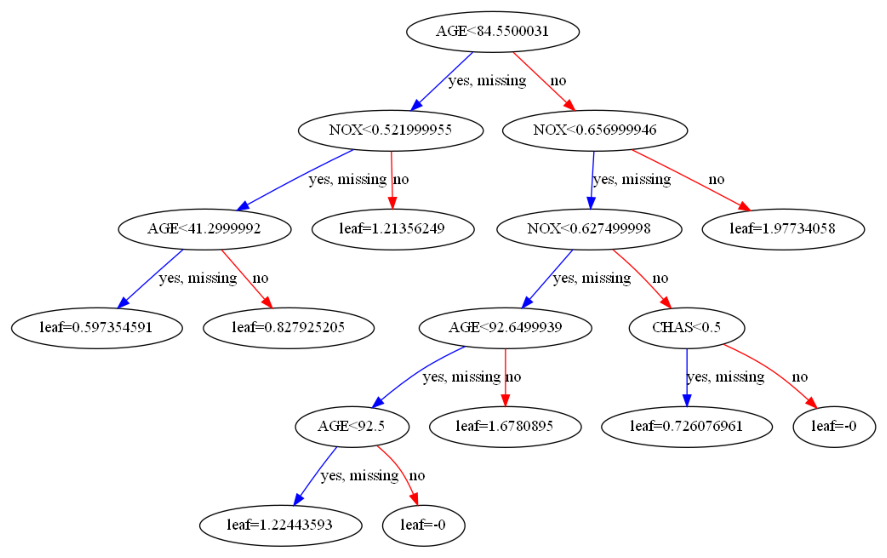

In [ ]:
#visualizing individual trees from the fully boosted model
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)
xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [1000, 100]
plt.show()


## **Optimization and Improvement**

**System Optimization:**

1.Regularization

2.Parallelization and Cache block

3.Tree Pruning

4.Cache-Awareness and Out-of-score computation

5.Sparsity Awareness

6.Weighted Quantile Sketch

7.Cross-validation